In [89]:
from keras.datasets import imdb
import numpy as np
from  matplotlib import pyplot as plt

In [90]:
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

In [91]:
len(Xt)

25000

In [92]:
print(XT[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


# Data preprocessing

In [93]:
word_idx = imdb.get_word_index()

In [94]:
idx_word = dict([value,key] for(key,value) in word_idx.items())

In [95]:
act_review = ' '.join([idx_word.get(idx-3,'?') for idx in XT[0]])

print(act_review)

In [96]:
##Vectorizing the data Every sentence represented by a vector of len 10000

def vactorize_sentences(sentences,dim=10000):
    
    output = np.zeros((len(sentences),dim))
    
    for i,idx in enumerate(sentences):
        
        output[i,idx] = 1
    
    return output
  

In [97]:
X_train = vactorize_sentences(XT)
X_test = vactorize_sentences(Xt)

In [98]:
print(X_train.shape)
print(X_test.shape)

(25000, 10000)
(25000, 10000)


In [99]:
print(X_train[:5])

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [114]:
Y_train = np.asarray(YT).astype('float32')
Y_test = np.asarray(Yt).astype('float32')

# Neural Network Model

In [115]:
from keras import models
from keras.layers import Dense

In [116]:
#Define the model
model = models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [117]:
#Compile the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [118]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


# Training and Validation

In [119]:
X_val = X_train[:5000]
X_train_new = X_train[5000:]

Y_val = Y_train[:5000]
Y_train_new = Y_train[5000:]

In [120]:
hist  = model.fit(X_train_new,Y_train_new,epochs=4,batch_size=512,validation_data=(X_val,Y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 1s 60us/step - loss: 0.4731 - acc: 0.8064 - val_loss: 0.3509 - val_acc: 0.8728
Epoch 2/4
20000/20000 [==============================] - 1s 53us/step - loss: 0.2671 - acc: 0.9114 - val_loss: 0.2826 - val_acc: 0.8878
Epoch 3/4
20000/20000 [==============================] - 1s 54us/step - loss: 0.2005 - acc: 0.9297 - val_loss: 0.2674 - val_acc: 0.8966
Epoch 4/4
20000/20000 [==============================] - 1s 54us/step - loss: 0.1665 - acc: 0.9415 - val_loss: 0.2722 - val_acc: 0.8938


# Visualizing results

In [121]:
h = hist.history

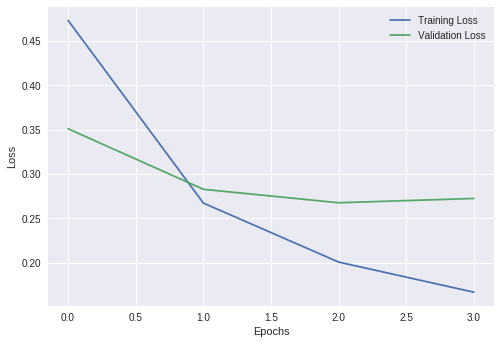

In [122]:
plt.plot(h['loss'],label='Training Loss')
plt.plot(h['val_loss'],label='Validation Loss')
plt.style.use('seaborn')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

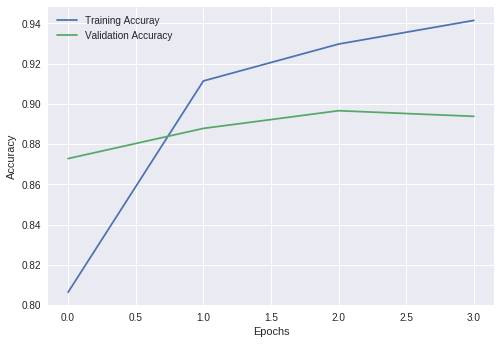

In [123]:
plt.plot(h['acc'],label='Training Accuray')
plt.plot(h['val_acc'],label='Validation Accuracy')
plt.style.use('seaborn')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Accuracy')
plt.show()

In [126]:
print("Testing Accuracy : %.4f"%(model.evaluate(X_test,Y_test)[1]))

25000/25000 [==============================] - 1s 44us/step
Testing Accuracy : 0.8817


In [127]:
print("Training Accuracy : %.4f"%(model.evaluate(X_train_new,Y_train_new)[1]))

20000/20000 [==============================] - 1s 45us/step
Training Accuracy : 0.9621
